In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy

# Preprocessing
- Clean data (resmove nan scores and out of range decile score)
- drop unused columns 
- label encoding 

### EDA 
- Correlation Matrix 
- age group breakdown visualization
- race breakdown visualization

In [2]:
compas = pd.read_csv('data/cox-violent-parsed.csv')
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [3]:
compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'], format='mixed')
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'], format='mixed')

compas['v_screening_date'] = pd.to_datetime(compas['v_screening_date'], format='mixed')
compas['vr_offense_date'] = pd.to_datetime(compas['vr_offense_date'], format='mixed')

compas['c_offense_date'] = pd.to_datetime(compas['c_offense_date'], format='mixed')
compas['c_arrest_date'] = pd.to_datetime(compas['c_arrest_date'], format='mixed')

compas['compas_screening_date'] = pd.to_datetime(compas['compas_screening_date'], format='mixed')

In [4]:
compas = compas.drop(['first','last','c_case_number','c_charge_degree', 'c_charge_desc', 'r_case_number','r_charge_degree','vr_case_number','vr_charge_degree','start','end','event'],axis=1)

#remove row with nan scores 
compas = compas.loc[compas['score_text'].notnull()]
#clean out the "-1" decile score from dataset 
compas = compas.loc[compas['v_decile_score'] != -1]

#label encodimg
compas['sex'] = compas['sex'].replace({'Male': 1, 'Female': 0})
compas['score_text'] = compas['score_text'].replace({'Low':0, 'Medium':1, 'High': 2})

#days in jail
compas['jail_out- jail_in'] = (compas['c_jail_out'] - compas['c_jail_in']).dt.days

In [5]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18293 entries, 0 to 18315
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10987 non-null  float64       
 1   name                     18293 non-null  object        
 2   compas_screening_date    18293 non-null  datetime64[ns]
 3   sex                      18293 non-null  int64         
 4   dob                      18293 non-null  object        
 5   age                      18293 non-null  int64         
 6   age_cat                  18293 non-null  object        
 7   race                     18293 non-null  object        
 8   juv_fel_count            18293 non-null  int64         
 9   decile_score             18293 non-null  int64         
 10  juv_misd_count           18293 non-null  int64         
 11  juv_other_count          18293 non-null  int64         
 12  priors_count             18293 non-nu

In [6]:
compas.describe(include=["object","category"]).T

,count,unique,top,freq
name,18293,10841,brandon ross,13
dob,18293,7475,21/11/1991,21
age_cat,18293,3,25 - 45,10364
race,18293,6,African-American,9779
r_offense_date,8410,1075,30/10/2014,33
r_charge_desc,8270,340,Possess Cannabis/20 Grams Or Less,635
r_jail_in,6357,972,29/04/2014,29
r_jail_out,6357,938,18/02/2014,28
vr_charge_desc,1339,83,Battery,529
type_of_assessment,18293,1,Risk of Recidivism,18293


In [7]:
compas.describe().T

,count,mean,min,25%,50%,75%,max,std
id,10987.0,5504.671976,1.0,2757.5,5505.0,8252.5,11001.0,3174.007529
compas_screening_date,18293,2013-11-30 02:42:28.515825920,2013-01-01 00:00:00,2013-05-14 00:00:00,2013-11-10 00:00:00,2014-06-02 00:00:00,2014-12-31 00:00:00,NaN
sex,18293.0,0.815285,0.0,1.0,1.0,1.0,1.0,0.388077
age,18293.0,34.010605,18.0,25.0,31.0,41.0,96.0,11.66114
juv_fel_count,18293.0,0.076969,0.0,0.0,0.0,0.0,20.0,0.464555
decile_score,18293.0,5.004592,1.0,2.0,5.0,8.0,10.0,2.931703
juv_misd_count,18293.0,0.098562,0.0,0.0,0.0,0.0,13.0,0.517953
juv_other_count,18293.0,0.124419,0.0,0.0,0.0,0.0,17.0,0.524848
priors_count,18293.0,3.916689,0.0,0.0,2.0,5.0,43.0,5.302139
days_b_screening_arrest,17004.0,4.296401,-597.0,-1.0,-1.0,0.0,1057.0,81.188376


In [8]:
compas_race = compas['race'].value_counts()
compas_race

race
African-American    9779
Caucasian           6076
Hispanic            1451
Other                859
Asian                 71
Native American       57
Name: count, dtype: int64

Text(0.5, 1.0, 'Race Breakdown')

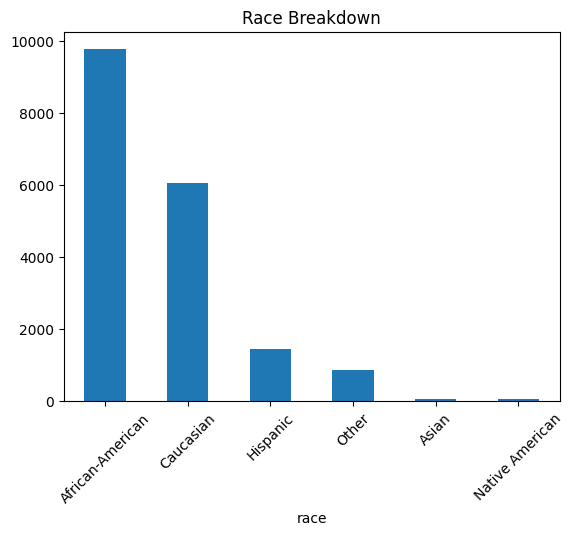

In [9]:
compas['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Race Breakdown")

Text(0.5, 1.0, 'Age Group Breakdown')

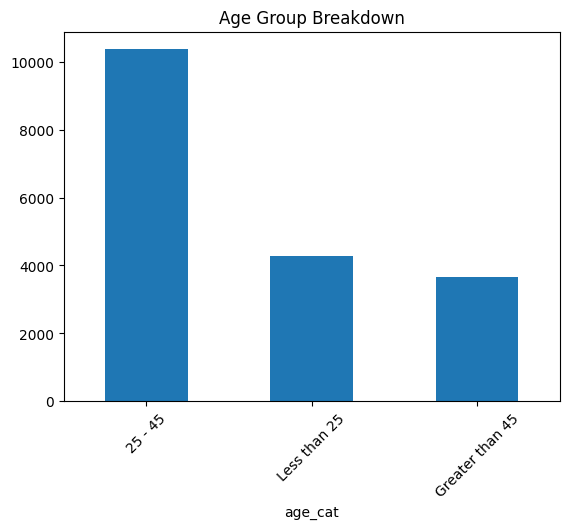

In [10]:
compas['age_cat'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Age Group Breakdown")

Text(0.5, 1.0, 'Gender BreakDown')

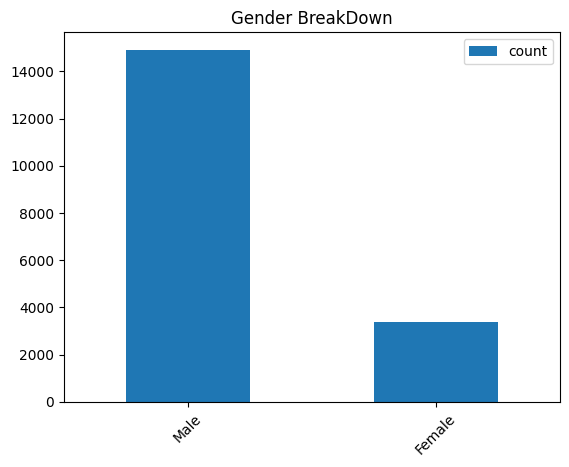

In [11]:

gender = pd.DataFrame(compas['sex'].value_counts())
gender.index = np.array(['Male', 'Female'])
gender.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Gender BreakDown")

Text(0.5, 1.0, 'Score Break Down')

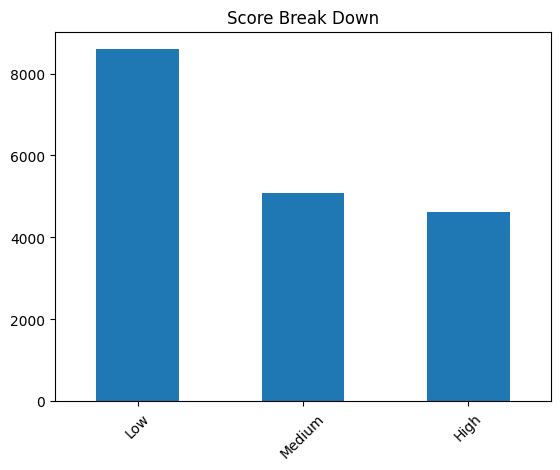

In [24]:
score = compas['score_text'].value_counts()
score.index = np.array(['Low','Medium','High'])
score.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Score Break Down")

In [12]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18293 entries, 0 to 18315
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10987 non-null  float64       
 1   name                     18293 non-null  object        
 2   compas_screening_date    18293 non-null  datetime64[ns]
 3   sex                      18293 non-null  int64         
 4   dob                      18293 non-null  object        
 5   age                      18293 non-null  int64         
 6   age_cat                  18293 non-null  object        
 7   race                     18293 non-null  object        
 8   juv_fel_count            18293 non-null  int64         
 9   decile_score             18293 non-null  int64         
 10  juv_misd_count           18293 non-null  int64         
 11  juv_other_count          18293 non-null  int64         
 12  priors_count             18293 non-nu

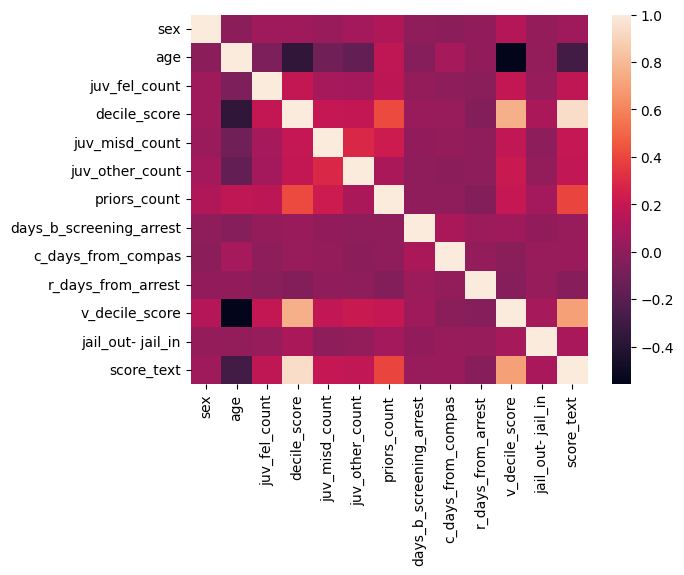

In [13]:
corr_matrix = compas[['sex', 'age','juv_fel_count', 'decile_score', 
                    'juv_misd_count','juv_other_count','priors_count', 
                    'days_b_screening_arrest', 'c_days_from_compas', 'r_days_from_arrest', 'v_decile_score', 'jail_out- jail_in','score_text' ]].corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [14]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,sex,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,r_days_from_arrest,v_decile_score,jail_out- jail_in,score_text
sex,1.000000,-0.006042,0.060368,0.051776,0.042168,0.068553,0.111336,0.005980,-0.012325,0.011362,0.138176,0.020809,0.056466
age,-0.006042,1.000000,-0.063011,-0.362236,-0.106335,-0.160345,0.177380,-0.031528,0.085158,0.007731,-0.559341,0.017512,-0.280872
juv_fel_count,0.060368,-0.063011,1.000000,0.185831,0.086160,0.068121,0.170462,0.021138,0.000184,-0.021365,0.185683,0.025773,0.177001
decile_score,0.051776,-0.362236,0.185831,1.000000,0.192673,0.185624,0.412462,0.041527,0.037559,-0.040150,0.759669,0.100220,0.940490
juv_misd_count,0.042168,-0.106335,0.086160,0.192673,1.000000,0.287710,0.224690,0.012093,0.020740,0.005634,0.180579,-0.002963,0.191646
juv_other_count,0.068553,-0.160345,0.068121,0.185624,0.287710,1.000000,0.097845,0.003668,-0.010757,-0.003184,0.212833,0.015588,0.180124
priors_count,0.111336,0.177380,0.170462,0.412462,0.224690,0.097845,1.000000,0.002149,0.005389,-0.038437,0.190978,0.074050,0.393327
days_b_screening_arrest,0.005980,-0.031528,0.021138,0.041527,0.012093,0.003668,0.002149,1.000000,0.093758,0.046573,0.050956,0.011221,0.032964
c_days_from_compas,-0.012325,0.085158,0.000184,0.037559,0.020740,-0.010757,0.005389,0.093758,1.000000,0.014772,-0.018501,0.032745,0.039670
r_days_from_arrest,0.011362,0.007731,-0.021365,-0.040150,0.005634,-0.003184,-0.038437,0.046573,0.014772,1.000000,-0.033346,0.026075,-0.026904


In [15]:
compas.head()

,id,name,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,jail_out- jail_in
0,1.0,miguel hernandez,2013-08-14,1,18/04/1947,69,Greater than 45,Other,0,1,...,0,14/08/2013,Risk of Violence,1,Low,2013-08-14,07/07/2014,14/07/2014,0,0.0
1,2.0,miguel hernandez,2013-08-14,1,18/04/1947,69,Greater than 45,Other,0,1,...,0,14/08/2013,Risk of Violence,1,Low,2013-08-14,07/07/2014,14/07/2014,0,0.0
2,3.0,michael ryan,2014-12-31,1,06/02/1985,31,25 - 45,Caucasian,0,5,...,1,31/12/2014,Risk of Violence,2,Low,2014-12-31,30/12/2014,03/01/2015,0,NaN
3,4.0,kevon dixon,2013-01-27,1,22/01/1982,34,25 - 45,African-American,0,3,...,0,27/01/2013,Risk of Violence,1,Low,2013-01-27,26/01/2013,05/02/2013,0,96.0
4,5.0,ed philo,2013-04-14,1,14/05/1991,24,Less than 25,African-American,0,4,...,0,14/04/2013,Risk of Violence,3,Low,2013-04-14,16/06/2013,16/06/2013,4,1.0


In [16]:
pearson_c = compas[['jail_out- jail_in','v_decile_score']].dropna(how='any')

print('Pearson Correlation Between Length of Stay (jail_out - jail_in) and COMPAS Decile Score')
scipy.stats.pearsonr(pearson_c['jail_out- jail_in'], pearson_c['v_decile_score'])

Pearson Correlation Between Length of Stay (jail_out - jail_in) and COMPAS Decile Score


PearsonRResult(statistic=0.08534432707088496, pvalue=7.292730888320041e-29)

In [25]:
count_c = compas[['sex', 'race', 'juv_fel_count','decile_score','juv_misd_count','priors_count', 'priors_count.1']]
count_c['sex'] = count_c['sex'].replace({1:'Male', 0:'Female'})
print('interaction table of counts between race/sex interactions')
count_c.groupby(['sex','race']).aggregate(['mean','std','median']).round(3).style.background_gradient(axis=0)

interaction table of counts between race/sex interactions


/tmp/ipykernel_973/2105940453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_c['sex'] = count_c['sex'].replace({1:'Male', 0:'Female'})


In [47]:
dec_pivot = compas[['v_decile_score','race']].groupby('race').apply(lambda x: x.groupby(['v_decile_score']).count()).unstack()
dec_pivot

race                                                 \
v_decile_score        1       2       3       4       5       6      7    
race                                                                      
African-American  1272.0  1135.0  1277.0  1142.0  1127.0  1058.0  943.0   
Asian               34.0    12.0     2.0    11.0     6.0     2.0    NaN   
Caucasian         1995.0  1000.0   893.0   625.0   518.0   399.0  264.0   
Hispanic           490.0   232.0   171.0   151.0   139.0    91.0   59.0   
Native American     13.0     8.0     7.0     9.0     6.0     4.0    5.0   
Other              311.0   149.0   115.0    87.0    66.0    56.0   32.0   

                                       
v_decile_score       8      9      10  
race                                   
African-American  746.0  747.0  332.0  
Asian               4.0    NaN    NaN  
Caucasian         167.0  140.0   75.0  
Hispanic           53.0   41.0   24.0  
Native American     NaN    5.0    NaN  
Other              24.0   15.0    4.0

Text(0.5, 1.0, 'decile scores by count for defendants by race')

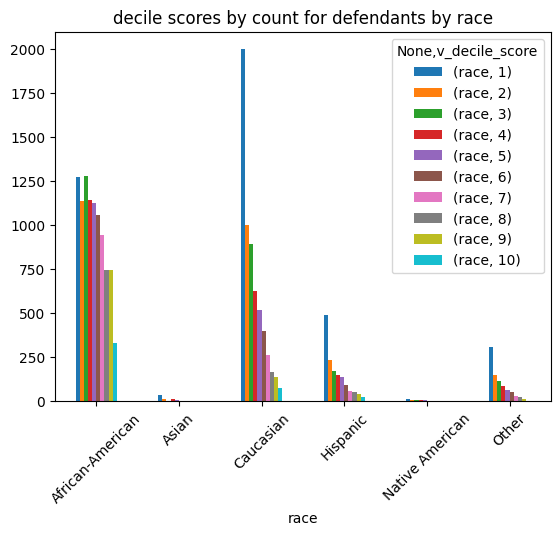

In [43]:
dec_pivot.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("decile scores by count for defendants by race")